### Read in the Libraries and Dataset

In [1]:
# Import libraries for our task
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn import preprocessing

import dvc.api
import numpy as np
import pandas as pd
import seaborn as sns 
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots

In [2]:
# Import system libraries and our Scripts

import os
import sys
import warnings
warnings.filterwarnings('ignore')
sys.path.append(os.path.abspath(os.path.join('../script')))
from train_classifiers import TrainingClassifier 

In [3]:
# Read AdSmart_AB_testing_data 

cleaned_data  = pd.read_csv('../data/clean_data.csv')

In [4]:
# The types and shape of data features in the dataset

cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   1243 non-null   int64 
 1   auction_id   1243 non-null   object
 2   experiment   1243 non-null   object
 3   date         1243 non-null   object
 4   hour         1243 non-null   int64 
 5   device_make  1243 non-null   object
 6   platform_os  1243 non-null   int64 
 7   browser      1243 non-null   object
 8   aware        1243 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 87.5+ KB


In [10]:
def get_data(tag, path='data/AdSmart_AB_testing_data.csv', repo='https://github.com/bkget/SmartAd-Performance-Analysis'):
    rev = tag
    data_url = dvc.api.get_url(path=path, repo=repo, rev=rev)
    df = pd.read_csv(data_url)
    return df

In [ ]:
read = get_data('v1')

##### Label Encoding the  Data

In [1]:
def encode_labels(df):
    date_encoder = preprocessing.LabelEncoder()
    device_encoder = preprocessing.LabelEncoder()
    browser_encoder = preprocessing.LabelEncoder()
    experiment_encoder = preprocessing.LabelEncoder()
    aware_encoder = preprocessing.LabelEncoder()
    
    df['date'] = date_encoder.fit_transform(df['date'])
    df['device_make'] = device_encoder.fit_transform(df['device_make'])
    df['browser'] = browser_encoder.fit_transform(df['browser'])
    df['experiment'] = experiment_encoder.fit_transform(df['experiment'])
    df['browser'] = aware_encoder.fit_transform(df['browser'])
    df['aware'] = aware_encoder.fit_transform(df['aware'])
    
    return df    

##### Spliting the data by browser and platform_os columns

In [55]:
def feature_data(df):
    
    browser_feature_df = df[["experiment", "hour", "date", 'device_make', 'browser', 'aware']] 
    platform_feature_df = df[["experiment", "hour", "date", 'device_make', 'platform_os', 'aware']] 

    return browser_feature_df, platform_feature_df

In [56]:
def save_encoded_df(df):
    
    broweser_df, platfrom_df = feature_data(df)
    broweser_df.save_csv("../Data/browser_featured_data.csv")
    platfrom_df.save_csv(platfrom_df, "../data/platform_featured_data.csv") 

In [57]:
cleaned_data = encode_labels(cleaned_data)
cleaned_browser_df, cleaned_platform_df = feature_data(cleaned_data)

In [58]:
cleaned_browser_df.head()

,experiment,hour,date,device_make,browser,aware
0,1,2,2,4,2,0
1,1,16,1,13,1,1
2,1,8,3,13,1,0
3,0,4,5,43,4,1
4,0,15,0,13,1,0


In [59]:
Y_col = 'aware'
X_cols = cleaned_browser_df.loc[:, cleaned_browser_df.columns != Y_col].columns

X_train,X_test,y_train,y_test=train_test_split(cleaned_browser_df[X_cols], cleaned_browser_df[Y_col],\
                                                test_size=0.1, random_state=42)

#### **Training Browser Featured Data**

##### Training with Logistic Regression

In [60]:
LR = TrainingClassifier(X_train, X_test,  y_train, y_test, "logistic_regression")

clf2, loss_arr_2, acc_arr_2 = LR.train(5)

step 0: Validation Accuracy of Logistic Regression Classifier is: 0.545
step 0: Validation Loss of Logistic Regression Classifier is: 0.675

step 1: Validation Accuracy of Logistic Regression Classifier is: 0.527
step 1: Validation Loss of Logistic Regression Classifier is: 0.688

step 2: Validation Accuracy of Logistic Regression Classifier is: 0.554
step 2: Validation Loss of Logistic Regression Classifier is: 0.668

step 3: Validation Accuracy of Logistic Regression Classifier is: 0.543
step 3: Validation Loss of Logistic Regression Classifier is: 0.676

step 4: Validation Accuracy of Logistic Regression Classifier is: 0.574
step 4: Validation Loss of Logistic Regression Classifier is: 0.653



step 1: Test Accuracy of Logistic Regression Classifier is: 0.552
Test Metrics
              precision    recall  f1-score   support

           0       0.89      0.54      0.67       107
           1       0.18      0.61      0.28        18

    accuracy                           0.55       125
   macro avg       0.54      0.58      0.48       125
weighted avg       0.79      0.55      0.62       125



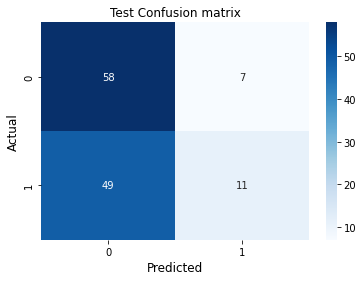

In [61]:
test_acc2, test_loss2, report2, matrix2  = LR.test()

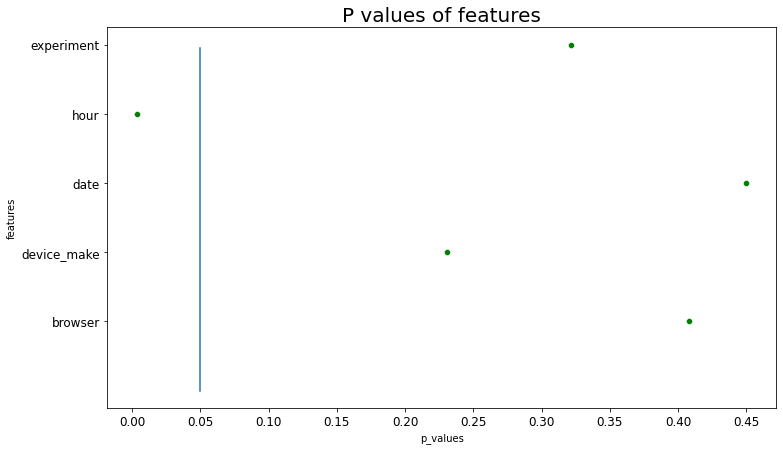

,features,p_values
0,experiment,0.321315
1,hour,0.003776
2,date,0.449766
3,device_make,0.230609
4,browser,0.408101


In [62]:
p_values_df = LR.get_p_values()
LR.plot_pvalues(p_values_df)
p_values_df

The P-value for experiment is 0.3. It is not that much significant, since our significance level is 0.05. Hour is the most important predictor for the Logestic Regression Model with p value 0.001, it is then follwed by device_make then experiment. The least predictor for the Logestic Regression Model is date

##### Training with RandomForest

In [63]:
RF = TrainingClassifier(X_train, X_test,  y_train, y_test, "random_forest")

clf2, loss_arr_2, acc_arr_2 = RF.train(5)

step 0: Validation Accuracy of Random Forest Classifier is: 0.522
step 0: Validation Loss of Random Forest Classifier is: 0.691

step 1: Validation Accuracy of Random Forest Classifier is: 0.554
step 1: Validation Loss of Random Forest Classifier is: 0.668

step 2: Validation Accuracy of Random Forest Classifier is: 0.540
step 2: Validation Loss of Random Forest Classifier is: 0.678

step 3: Validation Accuracy of Random Forest Classifier is: 0.489
step 3: Validation Loss of Random Forest Classifier is: 0.715

step 4: Validation Accuracy of Random Forest Classifier is: 0.570
step 4: Validation Loss of Random Forest Classifier is: 0.656



step 1: Test Accuracy of Random Forest Classifier is: 0.504
Test Metrics
              precision    recall  f1-score   support

           0       0.65      0.52      0.58        81
           1       0.35      0.48      0.40        44

    accuracy                           0.50       125
   macro avg       0.50      0.50      0.49       125
weighted avg       0.54      0.50      0.51       125

Loss on test data is: 0.704



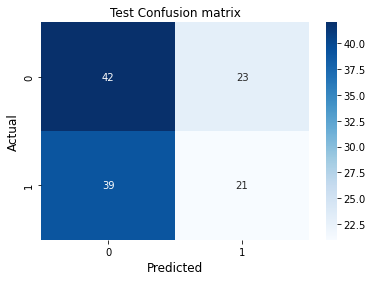

In [64]:
test_acc, loss, report, confusion_matrix = RF.test()
print(f"Loss on test data is: {loss:.3f}")
print()

In [65]:
RF.get_feature_importance()

,feature,feature_importances
0,experiment,0.049103
1,hour,0.387808
2,date,0.197266
3,device_make,0.286373
4,browser,0.079451


##### Training with XGBoost

In [66]:
XG = TrainingClassifier(X_train, X_test,  y_train, y_test, "xgboost")
clf, acc_arr, loss_arr = XG.train(5)

step 0: Validation Accuracy of XGBoost Classifier is: 0.554
step 0: Validation Loss of XGBoost Classifier is: 0.668

step 1: Validation Accuracy of XGBoost Classifier is: 0.558
step 1: Validation Loss of XGBoost Classifier is: 0.665

step 2: Validation Accuracy of XGBoost Classifier is: 0.580
step 2: Validation Loss of XGBoost Classifier is: 0.648

step 3: Validation Accuracy of XGBoost Classifier is: 0.480
step 3: Validation Loss of XGBoost Classifier is: 0.721

step 4: Validation Accuracy of XGBoost Classifier is: 0.583
step 4: Validation Loss of XGBoost Classifier is: 0.646



step 1: Test Accuracy of XGBoost Classifier is: 0.504
Test Metrics
              precision    recall  f1-score   support

           0       0.66      0.52      0.58        83
           1       0.33      0.48      0.39        42

    accuracy                           0.50       125
   macro avg       0.50      0.50      0.49       125
weighted avg       0.55      0.50      0.52       125

Loss on test data is: 0.704



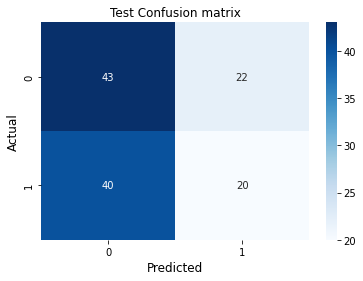

In [67]:
test_acc, loss, report, confusion_matrix = XG.test()
print(f"Loss on test data is: {loss:.3f}")
print()

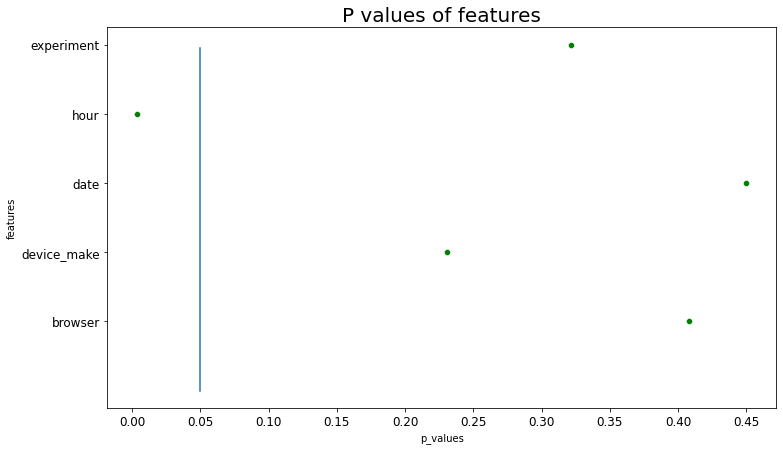

,features,p_values
0,experiment,0.321315
1,hour,0.003776
2,date,0.449766
3,device_make,0.230609
4,browser,0.408101


In [68]:
XG.plot_pvalues(p_values_df)
p_values_df